In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
from torch import nn  
import pandas as pd 
from google.colab.data_table import DataTable
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import time
import math
from sklearn.metrics import mean_squared_error

%matplotlib inline 

In [2]:
DataTable.max_columns = 28
DataTable.max_rows = 50000
pd.options.mode.chained_assignment = None # SettingWithCopyWarning - block [21]

Loading, merging and visualizing the data

In [3]:
data_2016 = pd.read_csv('pollen_2016.csv')
data_2016.head()

,location,date,ACER,ALNUS,AMBROSIA,ARTEMISIA,BETULA,CANNABACEAE,CARPINUS,CELTIS,...,PLANTAGO,PLATANUS,POACEAE,POPULUS,QUERCUS,RUMEX,SALIX,TILIA,ULMACEAE,URTICACEAE
0,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-11,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-12,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-13,1,4,0,0,0,0,0,0,...,0,0,0,7,0,0,0,0,28,0
4,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-14,3,5,0,0,2,0,11,0,...,0,0,0,11,0,0,0,0,39,0


In [4]:
data_2017 = pd.read_csv('pollen_2017.csv')

In [5]:
data_2018 = pd.read_csv('pollen_2018.csv')

In [6]:
data_2019 = pd.read_csv('pollen_2019.csv')

In [7]:
data_2020 = pd.read_csv('pollen_2020.csv')

In [8]:
data_2021 = pd.read_csv('pollen_2021.csv')

In [9]:
data_2022 = pd.read_csv('pollen_2022.csv')

In [10]:
lenght = np.sum([len(data_2016), len(data_2017), len(data_2018), len(data_2019), len(data_2020), len(data_2021), len(data_2022)])
lenght

41356

In [11]:
frames = [data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

dataframe = pd.concat(frames, ignore_index=True)

In [12]:
len(dataframe)

41356

In [13]:
dataframe.describe()

,ACER,ALNUS,AMBROSIA,ARTEMISIA,BETULA,CANNABACEAE,CARPINUS,CELTIS,CHENOP/AMAR.,CORYLUS,...,PLANTAGO,PLATANUS,POACEAE,POPULUS,QUERCUS,RUMEX,SALIX,TILIA,ULMACEAE,URTICACEAE
count,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,...,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000,41356.000000
mean,2.987475,2.605499,21.881178,1.124021,13.240763,1.908647,4.533852,0.126463,1.284916,2.914329,...,1.028243,3.349889,8.191435,3.445159,3.842127,0.500000,3.711457,0.956089,2.323436,22.697118
std,17.017513,23.359715,79.473889,3.785466,73.845289,8.000207,40.981409,5.581276,3.374744,17.952070,...,3.092798,40.197089,18.428294,47.160469,20.290086,10.908719,17.197311,4.730289,16.635220,48.920184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
max,902.000000,1511.000000,2136.000000,107.000000,2610.000000,242.000000,3337.000000,891.000000,58.000000,820.000000,...,109.000000,2825.000000,496.000000,8065.000000,1253.000000,2132.000000,736.000000,169.000000,1297.000000,1064.000000


In [14]:
dataframe.dropna()

,location,date,ACER,ALNUS,AMBROSIA,ARTEMISIA,BETULA,CANNABACEAE,CARPINUS,CELTIS,...,PLANTAGO,PLATANUS,POACEAE,POPULUS,QUERCUS,RUMEX,SALIX,TILIA,ULMACEAE,URTICACEAE
0,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-11,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-12,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-13,1,4,0,0,0,0,0,0,...,0,0,0,7,0,0,0,0,28,0
4,БЕОГРАД - ЗЕЛЕНО БРДО,2016-02-14,3,5,0,0,2,0,11,0,...,0,0,0,11,0,0,0,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41351,ЧАЧАК,2022-04-07,1,0,0,0,399,0,90,0,...,0,5,0,3,25,0,3,0,5,0
41352,ЧАЧАК,2022-04-08,18,0,0,0,1078,0,659,0,...,0,8,0,14,82,0,16,0,16,0
41353,ЧАЧАК,2022-04-09,9,0,0,0,1150,0,1091,0,...,0,7,0,8,75,0,15,0,6,0
41354,ЧАЧАК,2022-04-10,0,0,0,0,54,0,18,0,...,0,0,0,0,1,0,26,0,0,0


In [15]:
uniqueLocations = dataframe['location'].unique()
uniqueLocations

array(['БЕОГРАД - ЗЕЛЕНО БРДО', 'БЕОГРАД - НОВИ БЕОГРАД', 'БЕЧЕЈ',
       'ВРАЊЕ', 'ВРБАС', 'ВРШАЦ', 'ЗАЈЕЧАР', 'ЗЛАТИБОР', 'ЗРЕЊАНИН',
       'КИКИНДА', 'КРАГУЈЕВАЦ', 'КРАЉЕВО', 'КРУШЕВАЦ', 'КУЛА', 'ЛОЗНИЦА',
       'НИШ', 'НОВИ ПАЗАР', 'ОБРЕНОВАЦ', 'ПАНЧЕВО', 'ПОЖАРЕВАЦ',
       'СОКОБАЊА', 'СОМБОР', 'СРЕМСКА МИТРОВИЦА', 'СУБОТИЦА', 'ЧАЧАК',
       'ВАЉЕВО'], dtype=object)

In [16]:
len(uniqueLocations)

26

In [17]:
dict = {"БЕОГРАД - ЗЕЛЕНО БРДО" : '1',\
        "БЕОГРАД - НОВИ БЕОГРАД" : '2',\
        "БЕЧЕЈ": '3',\
        "ВРАЊЕ" : '4',\
        "ВРБАС": '5',\
        "ВРШАЦ": '6',\
        "ЗАЈЕЧАР": '7',\
        "ЗЛАТИБОР": '8',\
        "ЗРЕЊАНИН": '9',\
        "КИКИНДА": '10',\
        "КРАГУЈЕВАЦ": '11',\
        "КРАЉЕВО": '12',\
        "КРУШЕВАЦ": '13',\
        "КУЛА": '14',\
        "ЛОЗНИЦА": '15',\
        "НИШ": '16',\
        "НОВИ ПАЗАР": '17',\
        "ОБРЕНОВАЦ": '18',\
        "ПАНЧЕВО": '19',\
        "ПОЖАРЕВАЦ": '20',\
        "СОКОБАЊА": '21',\
        "СОМБОР": '22',\
        "СРЕМСКА МИТРОВИЦА": '23',\
        "СУБОТИЦА": '24',\
        "ЧАЧАК": '25',\
        "ВАЉЕВО": '26'}
df=dataframe.replace({"location": dict})
df

,location,date,ACER,ALNUS,AMBROSIA,ARTEMISIA,BETULA,CANNABACEAE,CARPINUS,CELTIS,...,PLANTAGO,PLATANUS,POACEAE,POPULUS,QUERCUS,RUMEX,SALIX,TILIA,ULMACEAE,URTICACEAE
0,1,2016-02-10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,1,2016-02-11,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2016-02-12,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,1,2016-02-13,1,4,0,0,0,0,0,0,...,0,0,0,7,0,0,0,0,28,0
4,1,2016-02-14,3,5,0,0,2,0,11,0,...,0,0,0,11,0,0,0,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41351,25,2022-04-07,1,0,0,0,399,0,90,0,...,0,5,0,3,25,0,3,0,5,0
41352,25,2022-04-08,18,0,0,0,1078,0,659,0,...,0,8,0,14,82,0,16,0,16,0
41353,25,2022-04-09,9,0,0,0,1150,0,1091,0,...,0,7,0,8,75,0,15,0,6,0
41354,25,2022-04-10,0,0,0,0,54,0,18,0,...,0,0,0,0,1,0,26,0,0,0


In [18]:
belgrade_newbelgrade = df.loc[df['location'] == '2']
belgrade_newbelgrade

,location,date,ACER,ALNUS,AMBROSIA,ARTEMISIA,BETULA,CANNABACEAE,CARPINUS,CELTIS,...,PLANTAGO,PLATANUS,POACEAE,POPULUS,QUERCUS,RUMEX,SALIX,TILIA,ULMACEAE,URTICACEAE
265,2,2016-02-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
266,2,2016-02-03,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
267,2,2016-02-04,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
268,2,2016-02-05,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,2,2016-02-06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39801,2,2022-04-14,67,2,0,0,57,0,24,0,...,0,9,0,10,16,0,11,0,12,0
39802,2,2022-04-15,37,0,0,0,58,0,27,0,...,0,33,0,0,40,0,19,0,20,0
39803,2,2022-04-16,23,0,0,0,55,0,19,0,...,0,33,0,0,65,0,26,0,46,0
39804,2,2022-04-17,60,4,0,0,100,0,43,0,...,0,13,0,6,28,0,21,0,14,0


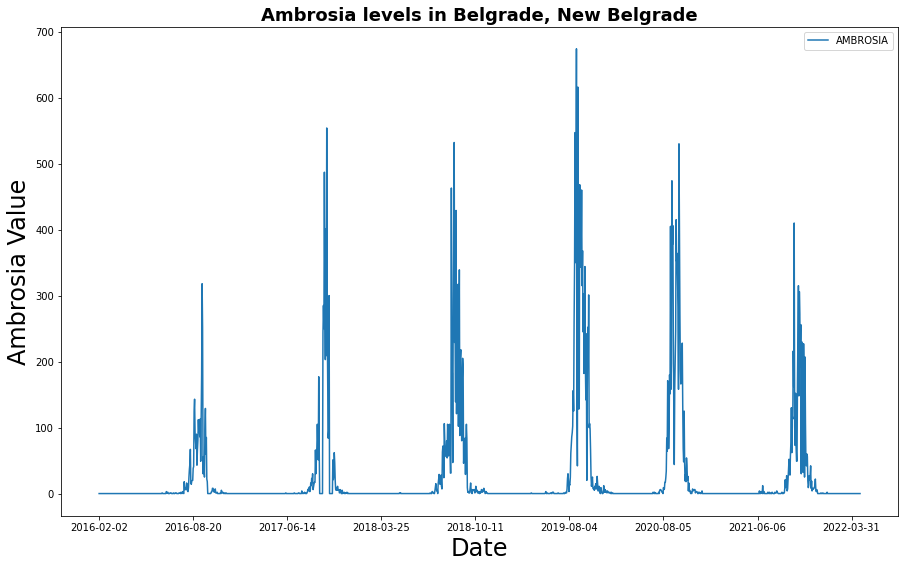

In [19]:
belgrade_newbelgrade.plot(x ='date', y='AMBROSIA', kind = 'line', figsize=(15,9))
plt.title("Ambrosia levels in Belgrade, New Belgrade", fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=24)
plt.ylabel('Ambrosia Value',fontsize=24)
plt.show()

Data normalization

In [20]:
levels = belgrade_newbelgrade[['AMBROSIA']]
levels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 265 to 39805
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   AMBROSIA  1619 non-null   int64
dtypes: int64(1)
memory usage: 25.3 KB


In [21]:
scaler = MinMaxScaler(feature_range=(-1, 1))
levels['AMBROSIA'] = scaler.fit_transform(levels['AMBROSIA'].values.reshape(-1,1))

Splitting the data

In [22]:
def split_data(ambrosia, window): # the sliding window method
    rawdata = ambrosia.to_numpy() # convert to numpy array
    data = []
    
    for i in range(len(rawdata) - window): # create all possible sequences 
        data.append(rawdata[i: i + window])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [23]:
window = 20 #sequence length
x_train, y_train, x_test, y_test = split_data(levels, window)

In [24]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1279, 19, 1)
y_train.shape =  (1279, 1)
x_test.shape =  (320, 19, 1)
y_test.shape =  (320, 1)


From numpy to torch

In [25]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)

In [26]:
x_train.size()

torch.Size([1279, 19, 1])

In [27]:
x_test.size()

torch.Size([320, 19, 1])

In [28]:
y_train_LSTM = torch.from_numpy(y_train).type(torch.Tensor)
y_test_LSTM = torch.from_numpy(y_test).type(torch.Tensor)

LSTM (Long Short-Term Memory)

In [29]:
class LSTM(nn.Module):
    def __init__(self, input_dimentions, hidden_dimentions, layers, output_dimentions):
        super(LSTM, self).__init__()
        self.hidden_dimentions = hidden_dimentions
        self.layers = layers
        
        self.lstm = nn.LSTM(input_dimentions, hidden_dimentions, layers, batch_first=True)
        self.fc = nn.Linear(hidden_dimentions, output_dimentions) # readout layer

    def forward(self, x):
        h0 = torch.zeros(self.layers, x.size(0), self.hidden_dimentions).requires_grad_() # initialize hidden state with zeros
        c0 = torch.zeros(self.layers, x.size(0), self.hidden_dimentions).requires_grad_()
        
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach())) # detach the hidden state to prevent vanishing gradients
                                                                 # a part of truncated backpropagation through time (BPTT)

        out = self.fc(out[:, -1, :])  #we want only the last time step hidden states

        return out

In [30]:
input_dimentions = 1
hidden_dimentions = 24
layers = 4
output_dimentions = 1
epochs = 500

In [31]:
network = LSTM(input_dimentions, hidden_dimentions, output_dimentions, layers)

criterion = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

In [32]:
hist = np.zeros(epochs)
start_time = time.time()
lstm = []

for t in range(epochs):

    y_train_pred = network(x_train)
    loss = criterion(y_train_pred, y_train_LSTM)

    hist[t] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #if t % 50 == 49:
    print("Epoch -", t, " ------ Mean Squared Error Loss: ", loss.item())
    print("-"*70)
   
training_time = time.time()-start_time

print("Training time: {}".format(training_time))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1279, 1])) that is different to the input size (torch.Size([1279, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch - 0  ------ Mean Squared Error Loss:  0.8926027417182922
----------------------------------------------------------------------
Epoch - 1  ------ Mean Squared Error Loss:  0.7791783213615417
----------------------------------------------------------------------
Epoch - 2  ------ Mean Squared Error Loss:  0.6664509177207947
----------------------------------------------------------------------
Epoch - 3  ------ Mean Squared Error Loss:  0.5451921224594116
----------------------------------------------------------------------
Epoch - 4  ------ Mean Squared Error Loss:  0.4124097228050232
----------------------------------------------------------------------
Epoch - 5  ------ Mean Squared Error Loss:  0.27339401841163635
----------------------------------------------------------------------
Epoch - 6  ------ Mean Squared Error Loss:  0.15427722036838531
----------------------------------------------------------------------
Epoch - 7  ------ Mean Squared Error Loss:  0.10223986208438

In [33]:
predicted = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_LSTM.detach().numpy()))

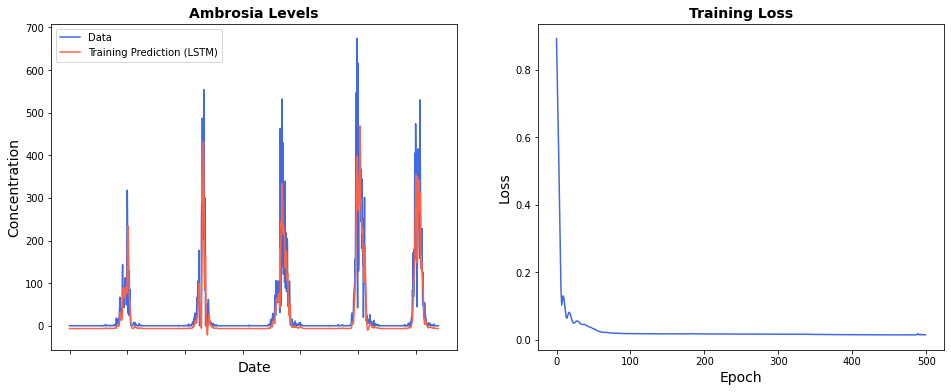

In [34]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predicted.index, y = predicted[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Ambrosia Levels', size = 14, fontweight='bold')
ax.set_xlabel("Date", size = 14)
ax.set_ylabel("Concentration", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

Root Mean Squared Error

In [35]:
y_test_pred = network(x_test)

# inverting the predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_LSTM.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_LSTM.detach().numpy())

In [36]:
train_score = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
test_score = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))

print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))

lstm.append(train_score)
lstm.append(test_score)
lstm.append(training_time)

Train Score: 41.36 RMSE
Test Score: 41.02 RMSE
